In [8]:
!pip install tensorflow
!pip install pillow
!pip install matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=0ebfde405b75570032eba31e91cdaf841d700a3a5915b329d7e211b112a11556
  Stored in directory: c:\users\crysi\appdata\local\pip\cache\wheels\09\6f\35\a8fac8b61de8e0d9eb07988481528898561923e260b1fa7d2f
Successfully built jax


You should consider upgrading via the 'C:\Users\crysi\PycharmProjects\TumorClassification\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [415]:
import os
import PIL
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

img_dir = "C:/Users/crysi/Downloads/archive(4)/Brain Tumor Data Set/Brain Tumor Data Set/"
for expression in os.listdir(img_dir):
    print(expression, "folder contians\t\t", len(os.listdir(img_dir + expression)), 'images')

BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

Data_gen = ImageDataGenerator(rescale = 1.0/255,validation_split = 0.2)


train_gen = Data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

valid_gen = Data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "validation")

labels = train_gen.class_indices

Brain Tumor folder contians		 2513 images
Healthy folder contians		 2087 images
Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


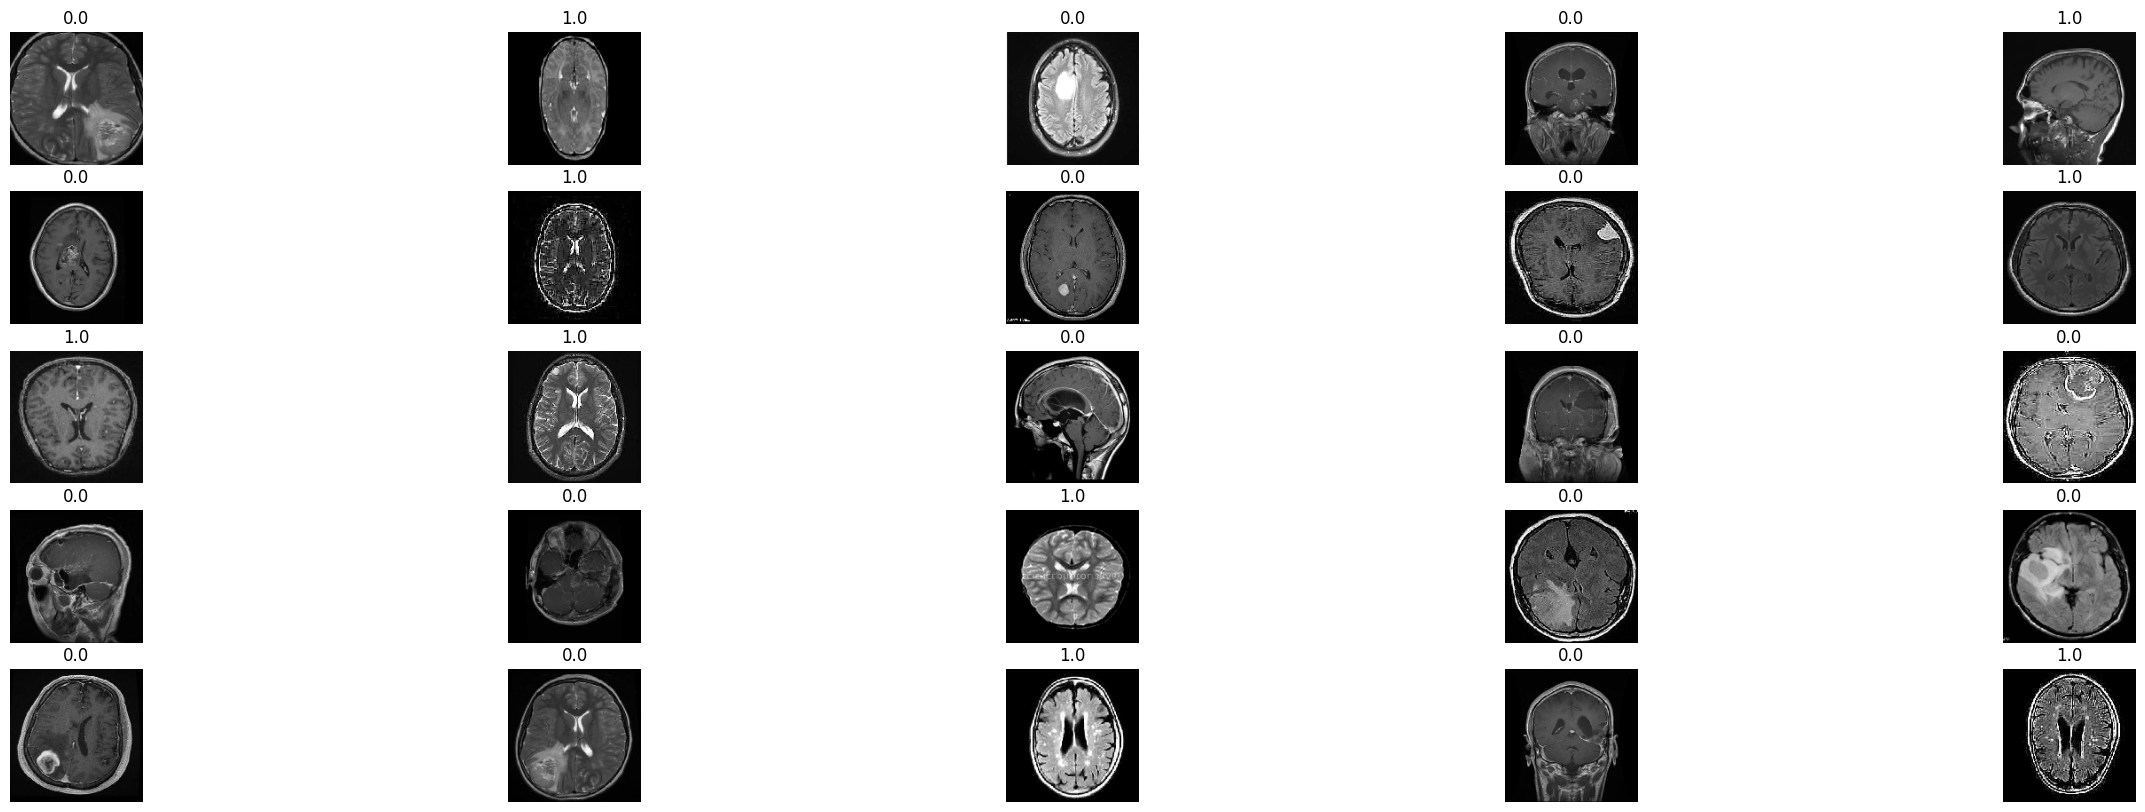

In [341]:
images, labels = train_gen.next()

fig, axes = plt.subplots(5, 5, figsize=(30, 10))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)
plt.show()

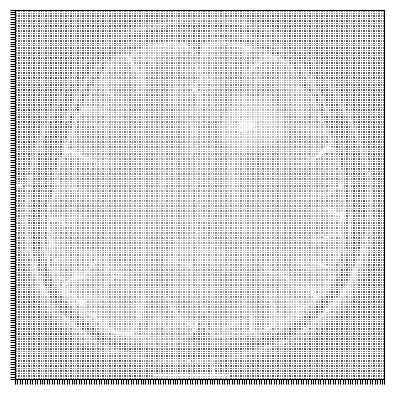

In [299]:
image = images[0]

# Create a new figure
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image, cmap="gray")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
fig.savefig('0.jpg', dpi=300)
ax.grid(color='w', linestyle='-', linewidth=1)
# Add a grid of all pixels on top of the image
#nrows, ncols = image.shape[:2]
#row, col = np.meshgrid(np.arange(nrows), np.arange(ncols), indexing='ij')
#ax.scatter(col, row, c=image.reshape(-1, 3), s=1, alpha=0.1, cmap='gray')
ax.set_xticks(np.arange(-0.5, 150, 1))
ax.set_yticks(np.arange(-0.5, 150, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
fig.savefig('1.jpg', dpi=300)
# Show the plot
plt.show()

In [416]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")])

In [417]:
model.compile(optimizer = tensorflow.keras.optimizers.Adam(), loss='binary_crossentropy', metrics = ['accuracy'])

In [418]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 17, 17, 128)    

In [360]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights = True)
checkpoint = ModelCheckpoint("Model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [361]:
history = model.fit(train_gen,verbose=1,callbacks = [early_stopping,checkpoint],epochs=20,validation_data=valid_gen)

Epoch 1/20
58/58 [==============================] - ETA: 0s - loss: 0.5642 - accuracy: 0.7183
Epoch 1: val_accuracy improved from -inf to 0.78999, saving model to Model.h5
58/58 [==============================] - 115s 2s/step - loss: 0.5642 - accuracy: 0.7183 - val_loss: 0.4486 - val_accuracy: 0.7900
Epoch 2/20
58/58 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.8533
Epoch 2: val_accuracy improved from 0.78999 to 0.90642, saving model to Model.h5
58/58 [==============================] - 79s 1s/step - loss: 0.3354 - accuracy: 0.8533 - val_loss: 0.2548 - val_accuracy: 0.9064
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9226
Epoch 3: val_accuracy did not improve from 0.90642
58/58 [==============================] - 80s 1s/step - loss: 0.2101 - accuracy: 0.9226 - val_loss: 0.2199 - val_accuracy: 0.8977
Epoch 4/20
58/58 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9557
Epoch 4: val_accuracy impr

In [419]:
model.load_weights('Model.h5')
score = model.evaluate(valid_gen ,steps =( valid_gen.n // 64) + 1)
print('\n', 'Validation accuracy:', score[1])

15/15 [==============================] - 6s 292ms/step - loss: 0.0188 - accuracy: 0.9924

 Validation accuracy: 0.9923830032348633


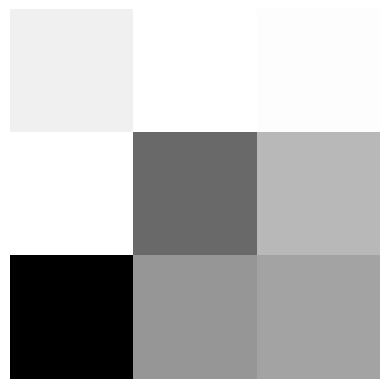

In [287]:
weights = model.layers[2].get_weights()[0]
fig, ax = plt.subplots()
ax.imshow(np.squeeze(weights[:, :, 0, 9]), cmap='gray')
ax.axis('off')
fig.savefig('f210.jpg', dpi=300)
plt.show()

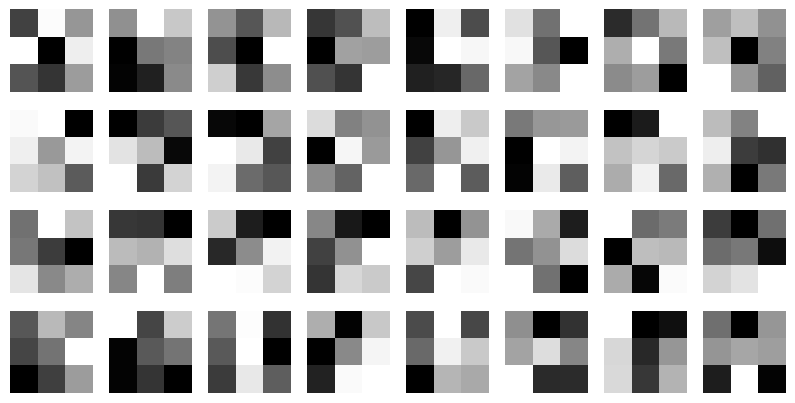

In [183]:
weights = model.layers[0].get_weights()[0]

# Reshape each filter to 28x28 and display as gray-scale image
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 5))
for i in range(32):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    ax.imshow(np.squeeze(weights[:, :, 0, i]), cmap='gray')
    ax.axis('off')
plt.show()

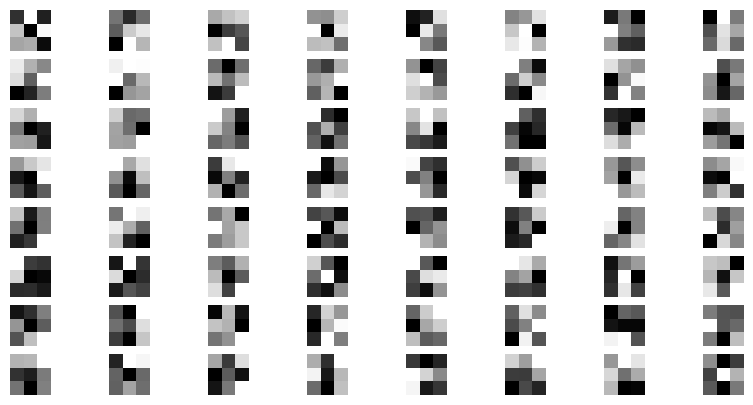

In [188]:
weights = model.layers[2].get_weights()[0]

# Reshape each filter to 28x28 and display as gray-scale image
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 5))
for i in range(64):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    ax.imshow(np.squeeze(weights[:, :, 0, i]), cmap='gray')
    ax.axis('off')
plt.show()

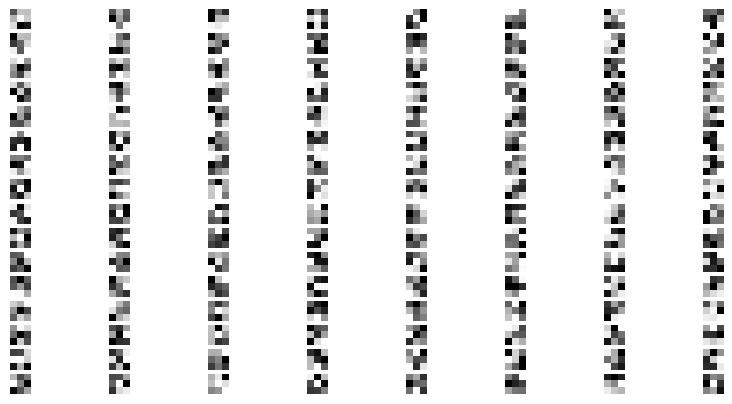

In [190]:
weights = model.layers[4].get_weights()[0]

# Reshape each filter to 28x28 and display as gray-scale image
fig, axes = plt.subplots(nrows=16, ncols=8, figsize=(10, 5))
for i in range(128):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    ax.imshow(np.squeeze(weights[:, :, 0, i]), cmap='gray')
    ax.axis('off')
plt.show()

1/1 [==============================] - 0s 49ms/step


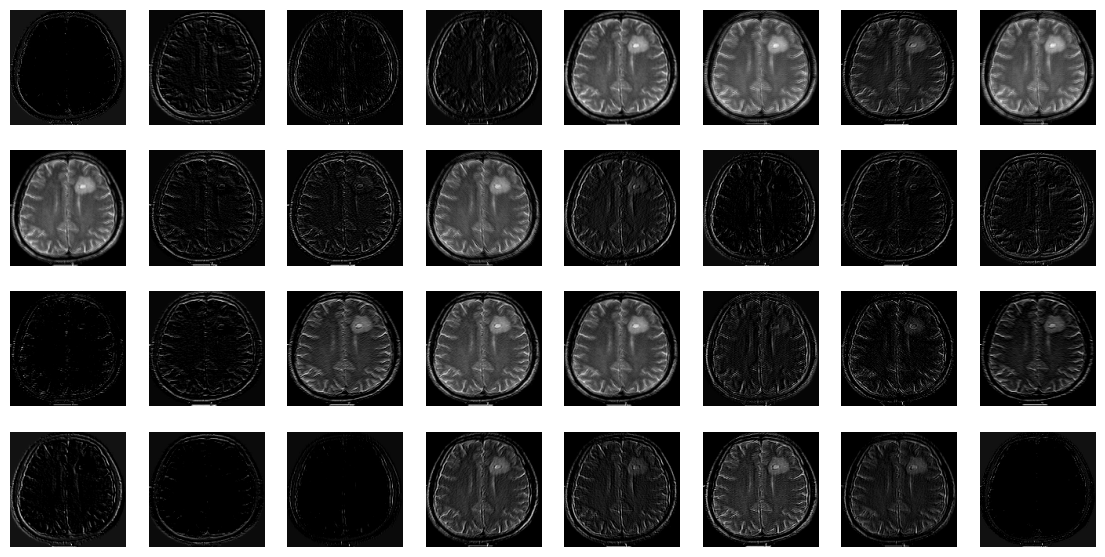

In [266]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model

# Choose the layer to visualize
layer_name = 'conv2d_3'

# Create a new model that outputs the intermediate activations of the chosen layer
activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load an example image and preprocess it
image = images[0]#plt.imread('C:/Users/crysi/Downloads/archive(4)/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (97).jpg')
image = np.expand_dims(image, axis=0)
#image = image / 255.0

# Predict the intermediate activations for the example image
activations = activation_model.predict(image)

# Plot the feature maps
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(14, 7))
for i in range(activations.shape[-1]):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    ax.imshow(activations[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()


1/1 [==============================] - 0s 64ms/step


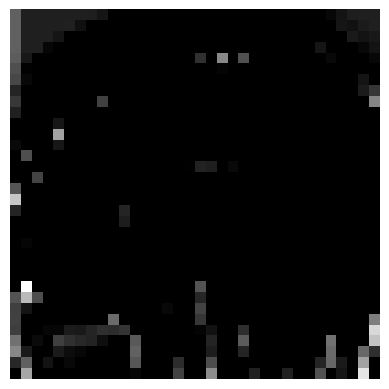

In [365]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Model

# Choose the layer to visualize
layer_name = 'conv2d_20'

# Create a new model that outputs the intermediate activations of the chosen layer
activation_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load an example image and preprocess it
image = images[25]#plt.imread('C:/Users/crysi/Downloads/archive(4)/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (97).jpg')
image = np.expand_dims(image, axis=0)
#image = image / 255.0
conv1_output = activation_model.predict(image)[0,:,:,9]

# Visualize the output
fig, ax = plt.subplots()
ax.imshow(conv1_output, cmap='gray')
ax.axis('off')
fig.savefig('fmx4.jpg', dpi=300)

plt.show()

2/2 [==============================] - 0s 110ms/step


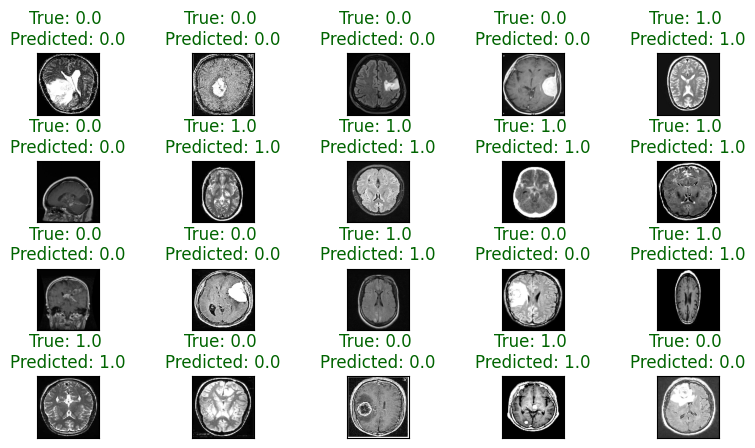

In [439]:
# Load the trained model
#model = model.load_weights('Model.h5')

# Load the CIFAR-10 dataset
valid_images, valid_labels = valid_gen.next()

# Preprocess the data
#X_test = X_test / 255.0

# Make predictions on the test set
y_pred = np.round(model.predict(valid_images))

# Select 10 random examples
#idx = np.random.choice(X_test.shape[0], size=10, replace=False)
correct_color = 'darkgreen'
incorrect_color = 'red'
# Plot the examples with their true label and predicted label
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 5),gridspec_kw={'hspace': 0.75, 'wspace': 0})
for i, ax in enumerate(axes.flat):
    ax.imshow(valid_images[i], cmap="gray")

    color = correct_color if valid_labels[i] == y_pred[i][0] else incorrect_color
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("True: %s \nPredicted: %s" % (valid_labels[i], y_pred[i][0]), color=color)

fig.savefig('tf.jpg', dpi=300)
plt.show()